In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline


# Read in the data.


In [119]:
df = pd.read_csv('titanic-passengers.csv', sep=";")
print (f'The number of columns is :', df.shape[0]) 
print (f'The number of rows is :', df.shape[1]) 
print ("    - A sample of the dataset :")
df.head(5)

The number of columns is : 891
The number of rows is : 12
    - A sample of the dataset :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [120]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
df.corr()
#the correlation matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

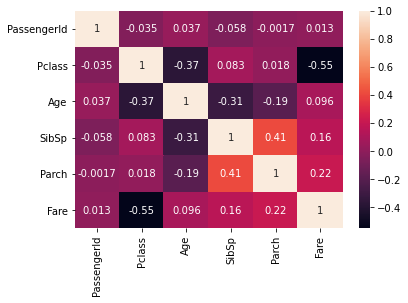

In [122]:
sns.heatmap( df.corr() , annot=True)
#Heatmap

Replace null value :


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [124]:
print ("The number of missing values per feature :")
df.isnull().sum()

The number of missing values per feature :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
#Replace age missing value with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'].isnull().sum()

0

In [126]:
df['Cabin'].isnull().sum()
len(df['Cabin'])
print("number of elements is=" , len(df['Cabin']))
print( df['Cabin'].value_counts() )


number of elements is= 891
C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
D15            1
A23            1
B39            1
A5             1
B42            1
Name: Cabin, Length: 147, dtype: int64


We can notice from the above that we can either chose G6, C23 C25 C27 or B96 B98
we're going to work with G6

In [128]:
df['Cabin'].fillna('G6' , inplace=True)
print( df['Cabin'].value_counts() )
df['Cabin'].isnull().sum()

G6             691
C23 C25 C27      4
B96 B98          4
E101             3
C22 C26          3
              ... 
D15              1
A23              1
B39              1
A5               1
B42              1
Name: Cabin, Length: 147, dtype: int64


0

In [129]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

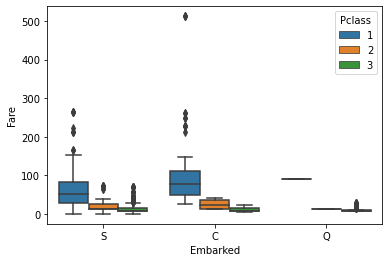

In [130]:
sns.boxplot(x="Embarked" , y="Fare" , hue="Pclass" , data=df)
plt.show()

We can notice from the boxplot that 'C' is the best option since it includes all the classes.

In [133]:
df['Embarked'].fillna('C' , inplace=True)
df['Embarked'].isnull().sum()

0

Transform categorical data to numerical data

In [137]:
sex={'male' : 1 ,'female' : 0}
df['Sex'].replace(sex,inplace=True)
Survived={'Yes' : 1 , 'No' :0 }
df['Survived'].replace(Survived , inplace=True)
Embarked={'S':0 , 'C':1 , 'Q':2}
df['Embarked'].replace(Embarked , inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,0
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0


<AxesSubplot:>

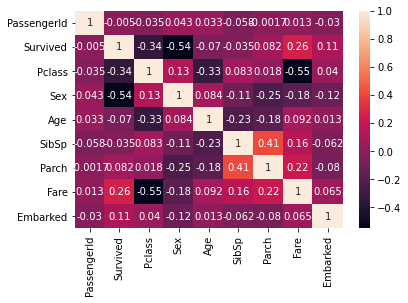

In [138]:
df.corr()
sns.heatmap( df.corr() , annot=True)

The most important features are 'Age' , 'Sex' , 'Pclass' 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

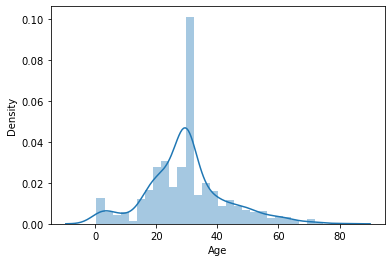

In [139]:
sns.distplot(df['Age'] , kde=True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

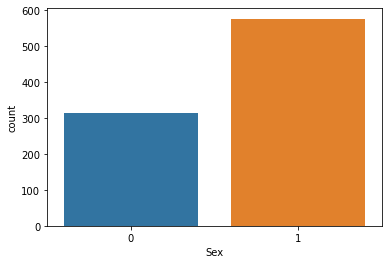

In [140]:
sns.countplot(x='Sex' , data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

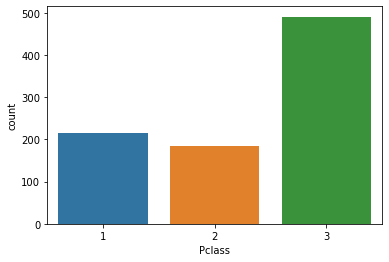

In [141]:
sns.countplot(x='Pclass' , data=df)

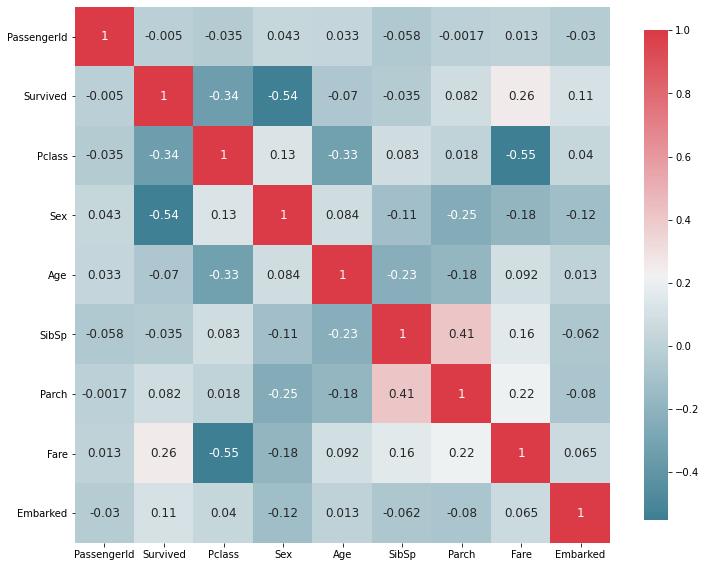

In [148]:
def plot_correlation_map ( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map (df)

We notice here that the couple sex-survived has the strongest correlations. 
In the other hand, age doesn't influence the survival of the passenger as we expected it to do.
We can notice too that the class has strong correlation with survived !

Plot other features :

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

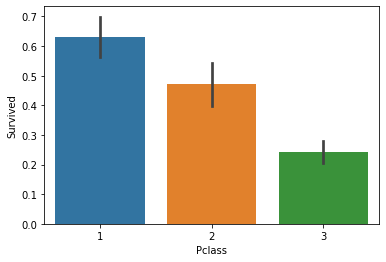

In [146]:
sns.barplot(x='Pclass' , y='Survived' , data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

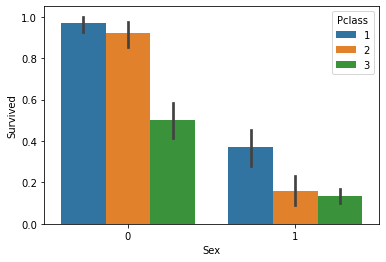

In [147]:
sns.barplot(x='Sex', y='Survived' , hue='Pclass' , data=df)

In [149]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [150]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,0
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0


In [151]:
def TITLE(N):
  S = N.split(',')
  T=S[1].split('.')
  return T[0]

df['Title']=df['Name'].apply(TITLE )

In [152]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,1,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,1,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,0,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

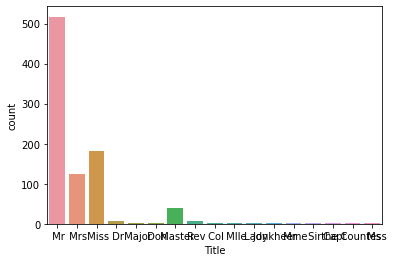

In [153]:
sns.countplot(x='Title' , data=df)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

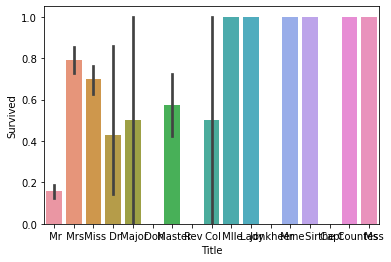

In [154]:
sns.barplot(x='Title' , y='Survived' , data=df)

<AxesSubplot:xlabel='Title', ylabel='Age'>

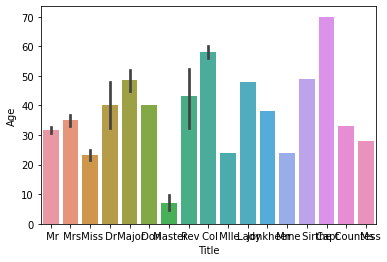

In [155]:
sns.barplot(x='Title' , y='Age' , data=df)

<AxesSubplot:xlabel='Title', ylabel='Sex'>

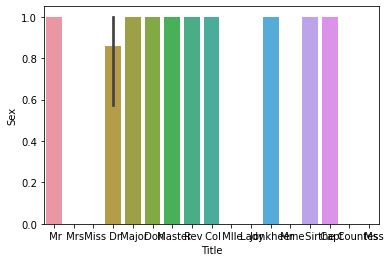

In [156]:
sns.barplot(x='Title' , y='Sex' , data=df)

In [157]:
Title_Dictionary = {

                    " Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer" ,

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty" ,

                  " the Countess": "Royalty",

                    " Dona":       "Royalty",

                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mrs" ,

                    " Master" :    "Master"

                    }
df['Title'].replace(Title_Dictionary , inplace=True)

In [158]:
df['Title'].unique()

array(['Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

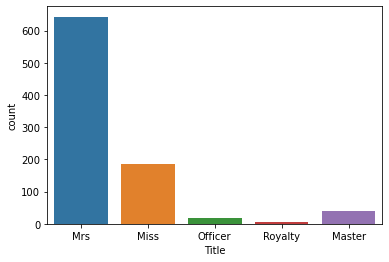

In [159]:
sns.countplot(x='Title' , data=df)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

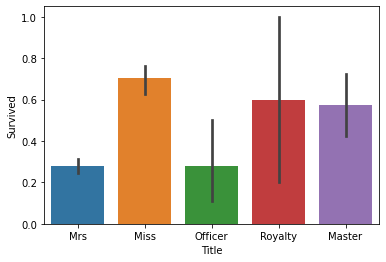

In [160]:
sns.barplot(x='Title' , y='Survived' , data=df)

<AxesSubplot:xlabel='Title', ylabel='Age'>

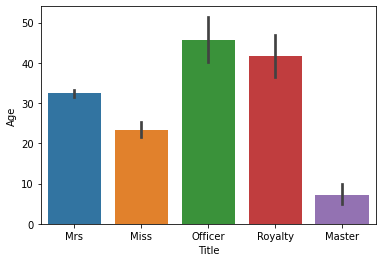

In [161]:
sns.barplot(x='Title' , y='Age' , data=df)

<AxesSubplot:xlabel='Title', ylabel='Sex'>

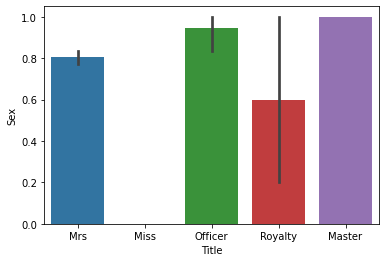

In [162]:
sns.barplot(x='Title' , y='Sex' , data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

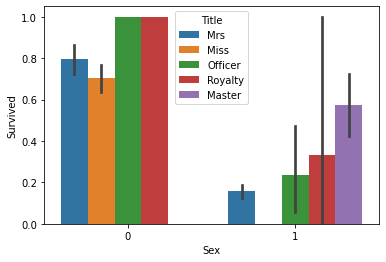

In [163]:
sns.barplot(x='Sex', y='Survived' , hue='Title' , data=df)

In [164]:
df['FamilySize']=df['Parch']+df['SibSp']+1

In [165]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,0,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,0,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,0,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,1,Mrs,2
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,1,Mrs,1
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,0,Miss,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,0,Mrs,1


In [166]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030444,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.111203,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.040138,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.121266,-0.200988
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.012971,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.061591,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.080277,0.783111
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.065492,0.217138
Embarked,-0.030444,0.111203,0.040138,-0.121266,0.012971,-0.061591,-0.080277,0.065492,1.000000,-0.082200
FamilySize,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,-0.082200,1.000000


Familysize isn't a fonctional feature since it has a very weak correlation with all the other features as "survived"
